# Exercise 5.11

In [1]:
import numpy as np
from IPython.display import display, Math
import matplotlib.pyplot as plt
from scipy import stats
from chapter_5_utils import simult_conf_int, bonferroni_conf_int, plot_confidence_ellipse

In [2]:
# Ancient Peruvian hair data.
# chromium (xi) and strontium (x2) levels
X = np.array([
    [.48, 40.53, 2.19 , .55 , .74 , .66 , .93 , .37 , .22],
    [12.57 , 73.68 , 11.13 , 20.03 , 20.29 , .78 , 4.64 , .43 , 1.08]
    ]).T
X

array([[ 0.48, 12.57],
       [40.53, 73.68],
       [ 2.19, 11.13],
       [ 0.55, 20.03],
       [ 0.74, 20.29],
       [ 0.66,  0.78],
       [ 0.93,  4.64],
       [ 0.37,  0.43],
       [ 0.22,  1.08]])

## (a)

In [3]:
n, p = X.shape
alpha = 0.10

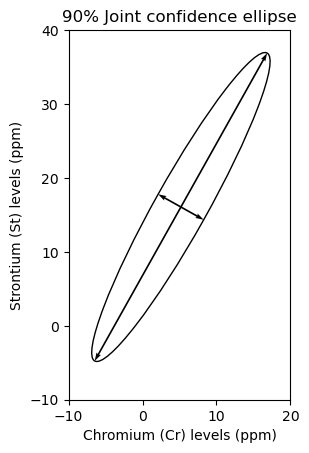

In [4]:
my_plot, ax = plot_confidence_ellipse(X, n, p, alpha)
my_plot.title('90% Joint confidence ellipse')
my_plot.xlabel('Chromium (Cr) levels (ppm)')
my_plot.ylabel('Strontium (St) levels (ppm)')
ax.set_xlim(-10, 20)
ax.set_ylim(-10, 40)
ax.set_aspect('equal')
my_plot.savefig('Question-5-11-a.png')
my_plot.show()

## (b)

In [5]:
simult_ci = simult_conf_int(X, alpha)
simult_ci

array([[-6.8811733 , 17.25228441],
       [-4.8269566 , 36.9669566 ]])

In [6]:
xbar = np.mean(X, axis=0).reshape(p, 1)
S = np.cov(X, rowvar=False)
f_crit = stats.f.ppf(1-alpha, dfn=p, dfd=n-p)
const = ((n-1)*p)/(n-p)

In [7]:
for i in range(simult_ci.shape[0]):
    display(Math(fr'{xbar[i,0]:.2f} \pm \sqrt{{{const*f_crit:.2f}}} '\
                 fr'\frac{{\sqrt{{{S[i,i]:.2f}}}}}{{\sqrt{{{n}}}}}\hspace{{0.5cm}} \text{{contains}}'\
                 fr'\hspace{{0.5cm}}\mu_{i+1}\hspace{{1cm}}\text{{or}}'\
                 fr'\hspace{{1cm}}{simult_ci[i,0]:.2f} \leq \mu_{i+1} '\
                 fr'\leq {simult_ci[i,1]:.2f}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

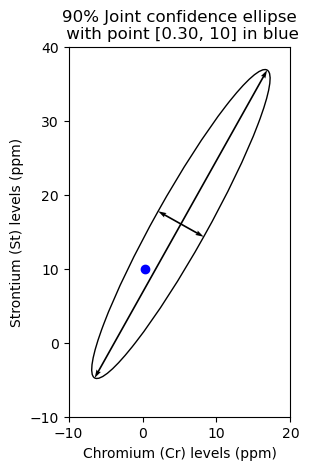

In [8]:
my_plot, ax = plot_confidence_ellipse(X, n, p, alpha)
ax.plot([0.30], [10], 'bo')
my_plot.title('90% Joint confidence ellipse'\
              '\n with point [0.30, 10] in blue'
              )
my_plot.xlabel('Chromium (Cr) levels (ppm)')
my_plot.ylabel('Strontium (St) levels (ppm)')
ax.set_xlim(-10, 20)
ax.set_ylim(-10, 40)
ax.set_aspect('equal')
my_plot.savefig('Question-5-11-b.png')
my_plot.show()

## (c)

In [9]:
def my_q_q_plot(x: np.ndarray):
    x = x.copy()
    assert len(x.shape) == 1, "Wrong shape."
    x.sort()
    prob = (np.arange(x.size)+1 - 0.5) / n
    quant = stats.norm.ppf(prob)

    return plt.scatter(quant, x)

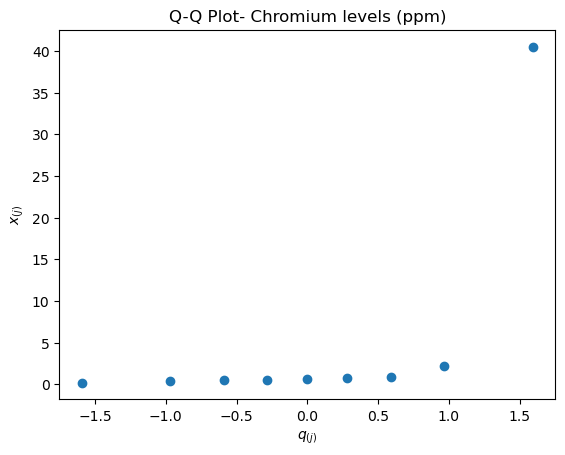

In [10]:
my_q_q_plot(X[:,0])
ax = plt.gca()
plt.title('Q-Q Plot- Chromium levels (ppm)')
plt.xlabel('$q_{(j)}$')
plt.ylabel('$x_{(j)}$')
plt.savefig('Question-5-11-c-QQ-Cr.png')
plt.show()

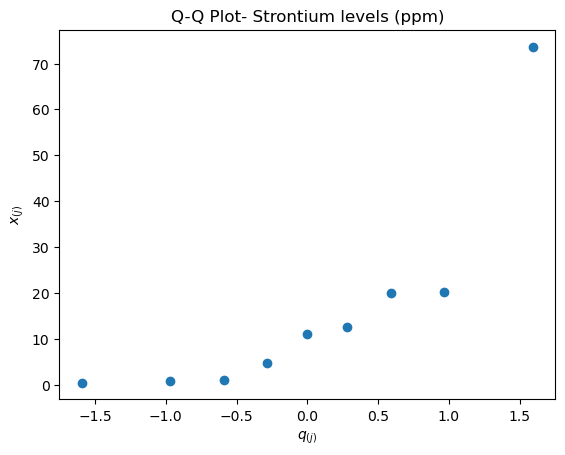

In [11]:
my_q_q_plot(X[:,1])
ax = plt.gca()
plt.title('Q-Q Plot- Strontium levels (ppm)')
plt.xlabel('$q_{(j)}$')
plt.ylabel('$x_{(j)}$')
plt.savefig('Question-5-11-c-QQ-St.png')
plt.show()

## (d)

In [12]:
X_del = np.delete(X, 1, axis=0)
X_del

array([[ 0.48, 12.57],
       [ 2.19, 11.13],
       [ 0.55, 20.03],
       [ 0.74, 20.29],
       [ 0.66,  0.78],
       [ 0.93,  4.64],
       [ 0.37,  0.43],
       [ 0.22,  1.08]])

In [13]:
n, p = X_del.shape
alpha = 0.10

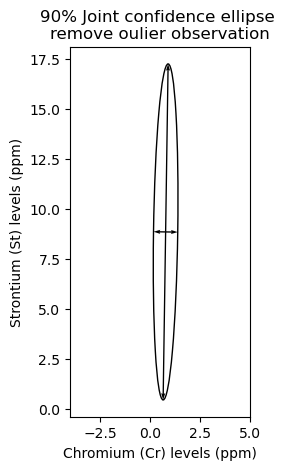

In [14]:
my_plot, ax = plot_confidence_ellipse(X_del, n, p, alpha)
my_plot.title('90% Joint confidence ellipse \n'\
              'remove oulier observation'
              )
my_plot.xlabel('Chromium (Cr) levels (ppm)')
my_plot.ylabel('Strontium (St) levels (ppm)')
ax.set_xlim(-4, 5)
# ax.set_ylim(-10, 40)
ax.set_aspect('equal')
my_plot.savefig('Question-5-11-d-CI-Ellipse.png')
my_plot.show()

In [15]:
del_simult_ci = simult_conf_int(X_del, alpha)
del_simult_ci

array([[ 0.14911559,  1.38588441],
       [ 0.468306  , 17.269194  ]])

In [16]:
xbar_del = np.mean(X_del, axis=0).reshape(p, 1)
S_del = np.cov(X_del, rowvar=False)
f_crit_del = stats.f.ppf(1-alpha, dfn=p, dfd=n-p)
const_del = ((n-1)*p)/(n-p)

In [17]:
for i in range(simult_ci.shape[0]):
    display(Math(fr'{xbar_del[i,0]:.2f} \pm \sqrt{{{const_del*f_crit_del:.2f}}} '\
                 fr'\frac{{\sqrt{{{S_del[i,i]:.2f}}}}}{{\sqrt{{{n}}}}}\hspace{{0.5cm}} \text{{contains}}'\
                 fr'\hspace{{0.5cm}}\mu_{i+1}\hspace{{1cm}}\text{{or}}'\
                 fr'\hspace{{1cm}}{del_simult_ci[i,0]:.2f} \leq \mu_{i+1} '\
                 fr'\leq {del_simult_ci[i,1]:.2f}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

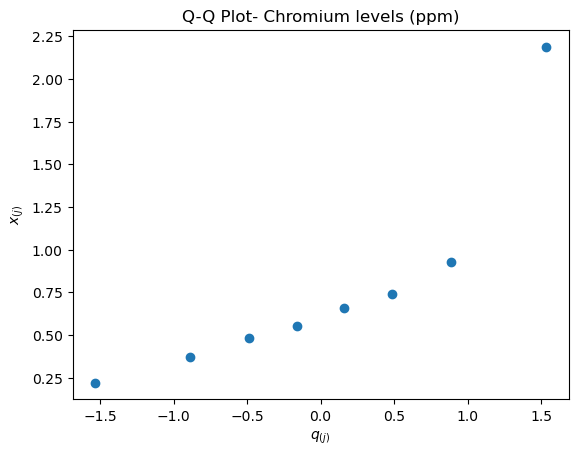

In [18]:
my_q_q_plot(X_del[:,0])
ax = plt.gca()
plt.title('Q-Q Plot- Chromium levels (ppm)')
plt.xlabel('$q_{(j)}$')
plt.ylabel('$x_{(j)}$')
plt.savefig('Question-5-11-d-QQ-Cr.png')
plt.show()

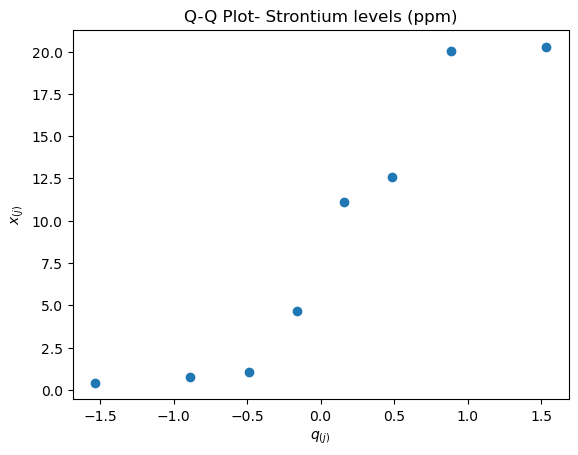

In [19]:
my_q_q_plot(X_del[:,1])
ax = plt.gca()
plt.title('Q-Q Plot- Strontium levels (ppm)')
plt.xlabel('$q_{(j)}$')
plt.ylabel('$x_{(j)}$')
plt.savefig('Question-5-11-d-QQ-St.png')
plt.show()

In [20]:
# The correlation coefficient between Cr and St for the original data.
np.corrcoef(X.T)[0,1]

0.9423891321117313

In [21]:
# The correlation coefficient between Cr and St for the data with outlier removed.
np.corrcoef(X_del.T)[0,1]

0.20034237714394837